In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# for PCA transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Remove nrows when ready for full dataset

# Remove 2K from name in last block for complete file

In [3]:
# WARNING, FILE "mergefiles.csv" IS 1.37 GB

delay_data = pd.read_csv("./Resources/mergefiles.csv", encoding = 'utf-8') #, nrows = 200000)
delay = pd.DataFrame(delay_data)

# 1. Data Exploration

In [4]:
# Data type
delay.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [5]:
delay.drop_duplicates()
delay.head()

MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  SEGMENT_NUMBER  \
0      1            7          0    0800-0859               2               1   
1      1            7          0    0700-0759               7               1   
2      1            7          0    0600-0659               7               1   
3      1            7          0    0600-0659               9               1   
4      1            7          0    0001-0559               7               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS            CARRIER_NAME  \
0                  25              143  Southwest Airlines Co.   
1                  29              191    Delta Air Lines Inc.   
2                  27              199    Delta Air Lines Inc.   
3                  27              180    Delta Air Lines Inc.   
4                  10              182        Spirit Air Lines   

   AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
0                  13056  ...          8  McCarran International     36.08   
1                  13056  ...          3  McCarran International     36.08   
2                  13056  ...         18  McCarran International     36.08   
3                  13056  ...          2  McCarran International     36.08   
4                  13056  ...          1  McCarran International     36.08   

   LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW SNWD  TMAX  AWND  
0   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
1   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
2   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
3   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
4   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  

[5 rows x 26 columns]

In [6]:
# Missing data
delay.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [7]:
# Number of unique values, and range
for col in delay.columns:
    print(f'"{col}" has {delay[col].nunique()} unique values, from {delay[col].min()} to {delay[col].max()}')

"MONTH" has 12 unique values, from 1 to 12
"DAY_OF_WEEK" has 7 unique values, from 1 to 7
"DEP_DEL15" has 2 unique values, from 0 to 1
"DEP_TIME_BLK" has 19 unique values, from 0001-0559 to 2300-2359
"DISTANCE_GROUP" has 11 unique values, from 1 to 11
"SEGMENT_NUMBER" has 15 unique values, from 1 to 15
"CONCURRENT_FLIGHTS" has 107 unique values, from 1 to 109
"NUMBER_OF_SEATS" has 82 unique values, from 44 to 337
"CARRIER_NAME" has 17 unique values, from Alaska Airlines Inc. to United Air Lines Inc.
"AIRPORT_FLIGHTS_MONTH" has 969 unique values, from 1100 to 35256
"AIRLINE_FLIGHTS_MONTH" has 204 unique values, from 5582 to 117728
"AIRLINE_AIRPORT_FLIGHTS_MONTH" has 2119 unique values, from 1 to 21837
"AVG_MONTHLY_PASS_AIRPORT" has 96 unique values, from 70476 to 4365661
"AVG_MONTHLY_PASS_AIRLINE" has 17 unique values, from 473794 to 13382999
"FLT_ATTENDANTS_PER_PASS" has 14 unique values, from 0.0 to 0.000348407665605
"GROUND_SERV_PER_PASS" has 17 unique values, from 7.134694872433899e

In [8]:
# Number of flights not delayed (0), and delayed (1)
delay['DEP_DEL15'].value_counts()

0    5261694
1    1227368
Name: DEP_DEL15, dtype: int64

In [9]:
# Number of airports
delay['DEPARTING_AIRPORT'].nunique()

96

In [10]:
# Number of flights per airport
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()

DEPARTING_AIRPORT
Adams Field                           12067
Albany International                   5632
Albuquerque International Sunport     23403
Anchorage International               18828
Atlanta Municipal                    392603
                                      ...  
Tucson International                  19036
Tulsa International                   16781
Washington Dulles International       68232
Will Rogers World                     23653
William P Hobby                       58524
Name: DEP_DEL15, Length: 96, dtype: int64

In [11]:
# Replace " " with "_"
#delay = delay.replace(" ", "_", regex = True)
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace(" ", "_")
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace("/", "_")
delay['DEP_TIME_BLK'] = delay['DEP_TIME_BLK'].str.replace("-", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace(" ", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("/", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace(".", "")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("'Hare", "Hare")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("-", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(" ", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace("/", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(".", "")
delay.head(5)

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  SEGMENT_NUMBER  \
0      1            7          0    0800_0859               2               1   
1      1            7          0    0700_0759               7               1   
2      1            7          0    0600_0659               7               1   
3      1            7          0    0600_0659               9               1   
4      1            7          0    0001_0559               7               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS           CARRIER_NAME  \
0                  25              143  Southwest_Airlines_Co   
1                  29              191    Delta_Air_Lines_Inc   
2                  27              199    Delta_Air_Lines_Inc   
3                  27              180    Delta_Air_Lines_Inc   
4                  10              182       Spirit_Air_Lines   

   AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
0                  13056  ...          8  McCarran_International     36.08   
1                  13056  ...          3  McCarran_International     36.08   
2                  13056  ...         18  McCarran_International     36.08   
3                  13056  ...          2  McCarran_International     36.08   
4                  13056  ...          1  McCarran_International     36.08   

   LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW SNWD  TMAX  AWND  
0   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
1   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
2   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
3   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
4   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  

[5 rows x 26 columns]

In [12]:
# Airport with least number of flights
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().min()

84

In [13]:
# Grouped by airport: count of delay/on-time
print(delay.groupby(['DEPARTING_AIRPORT','DEP_DEL15'])['MONTH'].agg('count'))

DEPARTING_AIRPORT                  DEP_DEL15
Adams_Field                        0            10135
                                   1             1932
Albany_International               0             4596
                                   1             1036
Albuquerque_International_Sunport  0            19559
                                                ...  
Washington_Dulles_International    1            10727
Will_Rogers_World                  0            19669
                                   1             3984
William_P_Hobby                    0            44079
                                   1            14445
Name: MONTH, Length: 192, dtype: int64


### Distance group
1 to 11
Distance group to be flown by departing aircraft.

<AxesSubplot:>

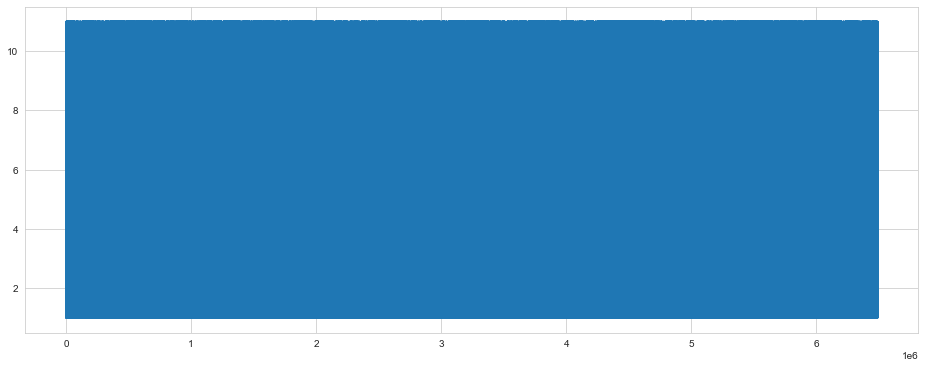

In [14]:
sns.set_style('whitegrid')
delay["DISTANCE_GROUP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

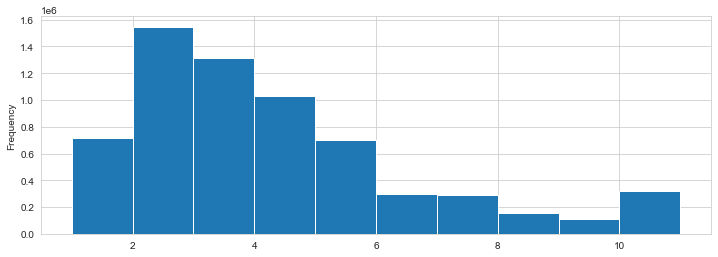

In [15]:
delay['DISTANCE_GROUP'].plot(kind='hist', figsize = (12, 4))

### Segment number
1 to 15
The segment that this tail number is on for the day.

<AxesSubplot:>

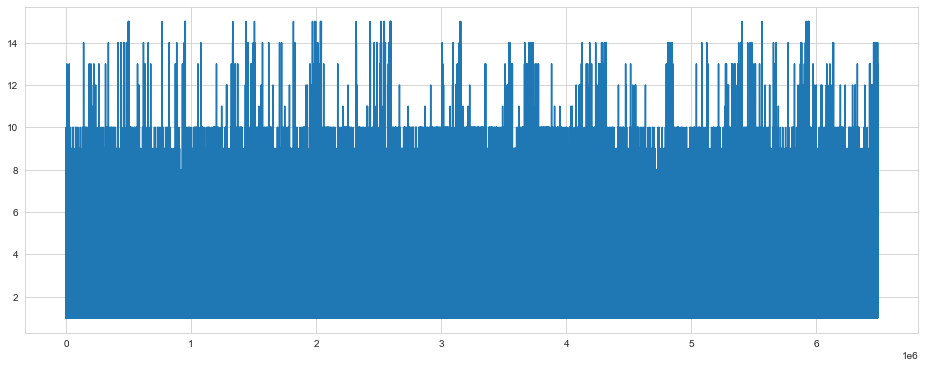

In [16]:
delay["SEGMENT_NUMBER"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

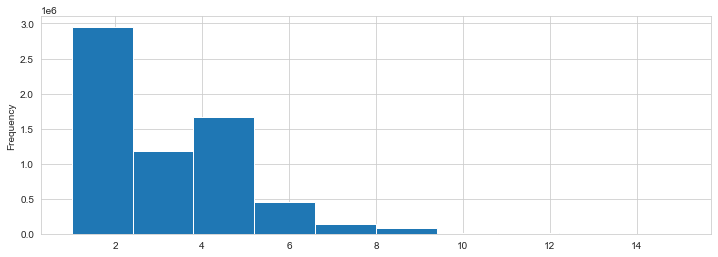

In [17]:
delay['SEGMENT_NUMBER'].plot(kind = 'hist', figsize = (12, 4))

### Concurrent flights

<AxesSubplot:>

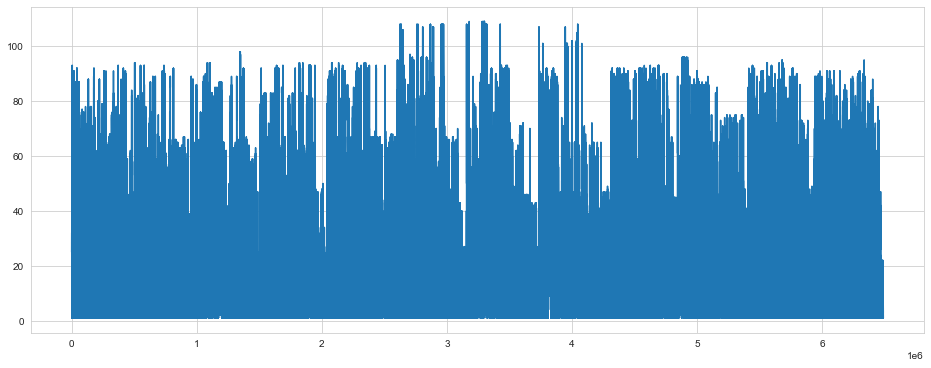

In [18]:
delay["CONCURRENT_FLIGHTS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

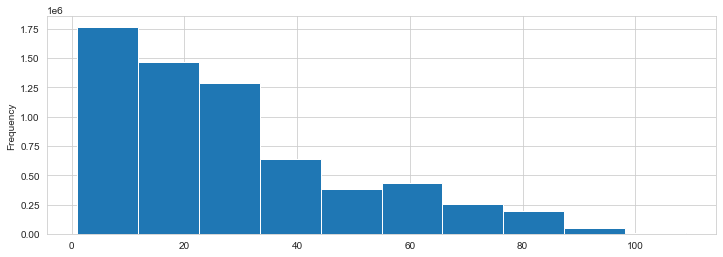

In [19]:
delay['CONCURRENT_FLIGHTS'].plot(kind = 'hist', figsize = (12, 4))

### Number of seats

<AxesSubplot:>

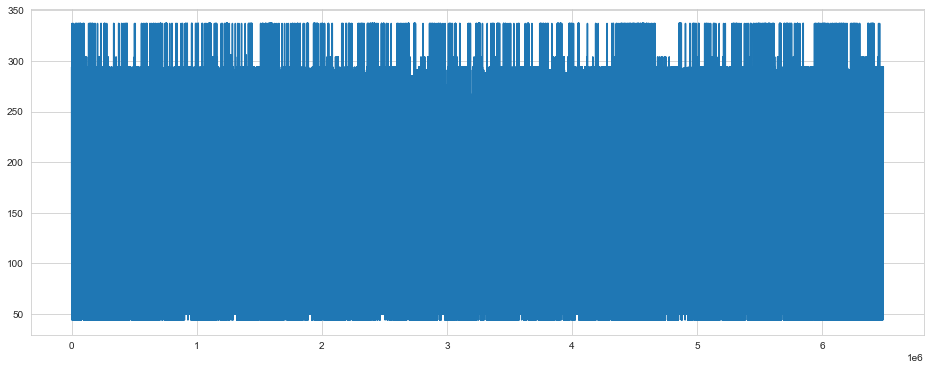

In [20]:
delay["NUMBER_OF_SEATS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

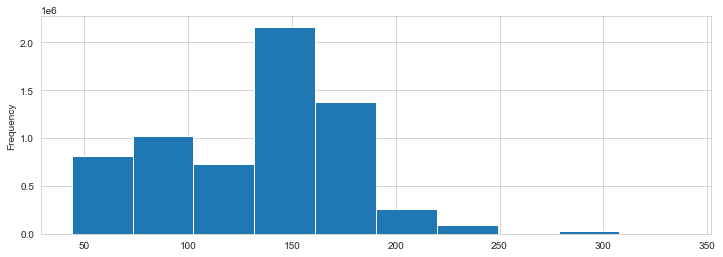

In [21]:
delay['NUMBER_OF_SEATS'].plot(kind = 'hist', figsize = (12, 4))

### Airport flights per month

<AxesSubplot:>

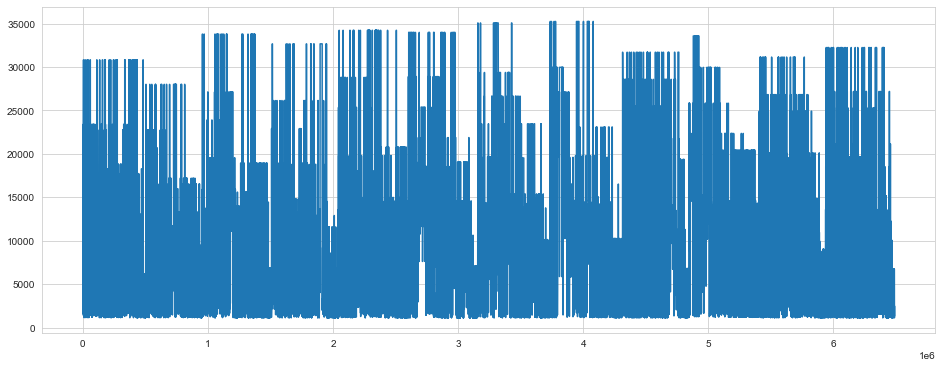

In [22]:
delay["AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

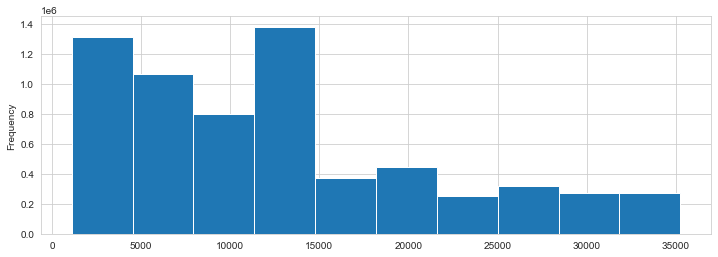

In [23]:
delay['AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### Airline flights per month

<AxesSubplot:>

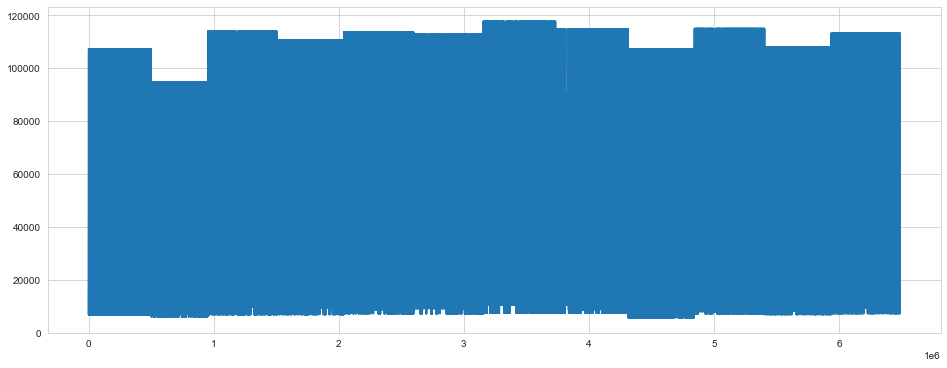

In [24]:
delay["AIRLINE_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

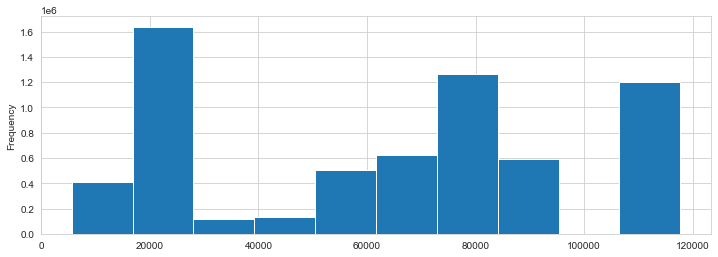

In [25]:
delay['AIRLINE_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AIRLINE_AIRPORT_FLIGHTS_MONTH

<AxesSubplot:>

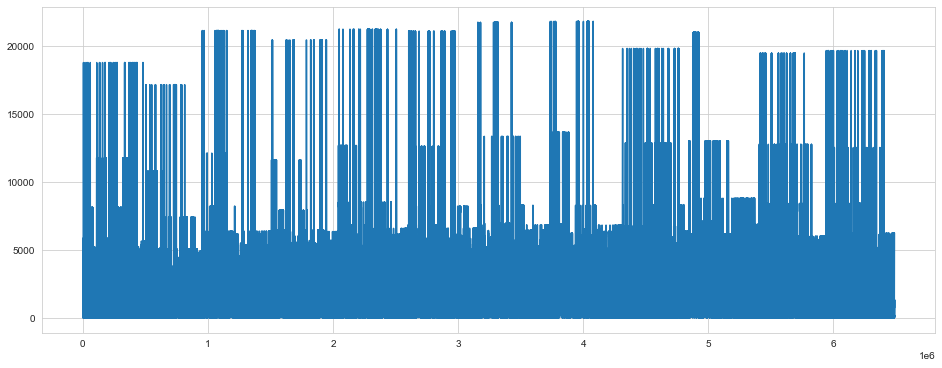

In [26]:
delay["AIRLINE_AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

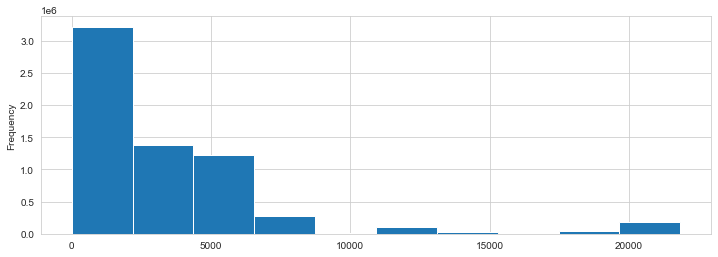

In [27]:
delay['AIRLINE_AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRPORT

<AxesSubplot:>

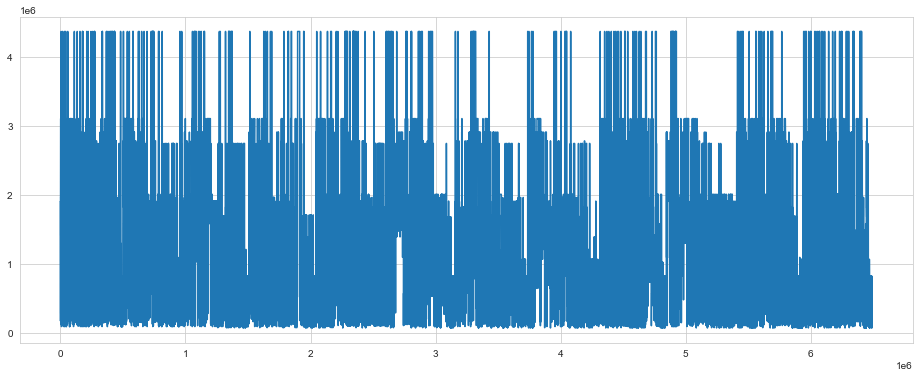

In [28]:
delay["AVG_MONTHLY_PASS_AIRPORT"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

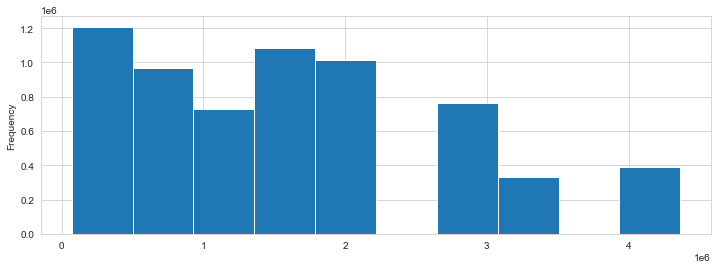

In [29]:
delay['AVG_MONTHLY_PASS_AIRPORT'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:>

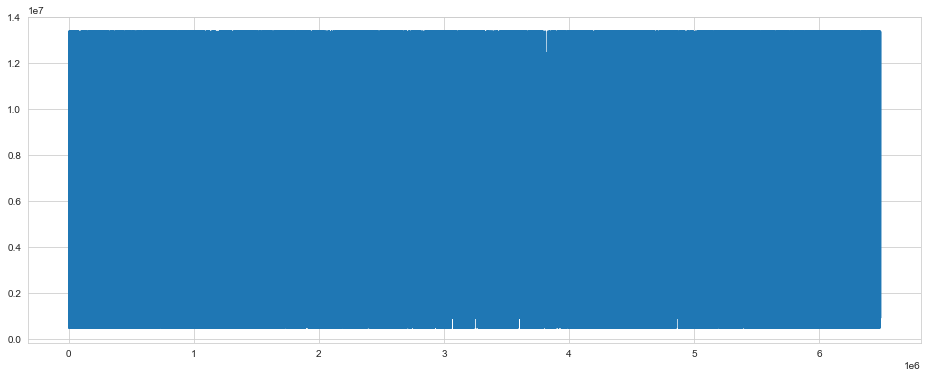

In [30]:
delay["AVG_MONTHLY_PASS_AIRLINE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

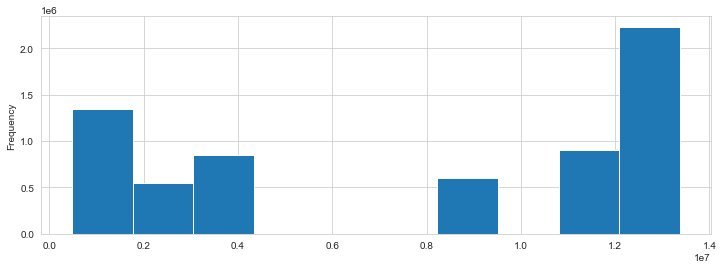

In [31]:
delay['AVG_MONTHLY_PASS_AIRLINE'].plot(kind = 'hist', figsize = (12, 4))

### FLT_ATTENDANTS_PER_PASS

<AxesSubplot:>

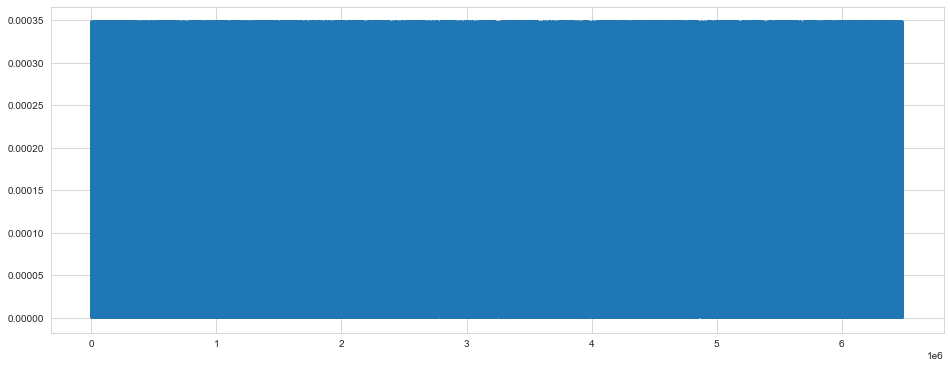

In [32]:
delay["FLT_ATTENDANTS_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

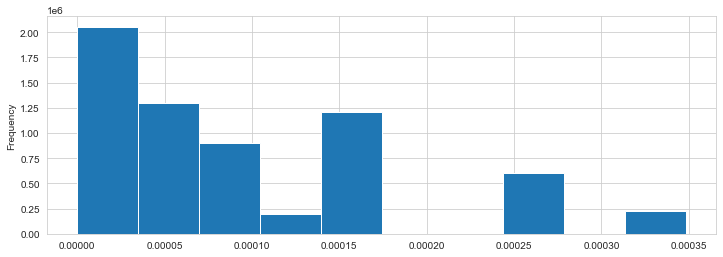

In [33]:
delay['FLT_ATTENDANTS_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### GROUND_SERV_PER_PASS

<AxesSubplot:>

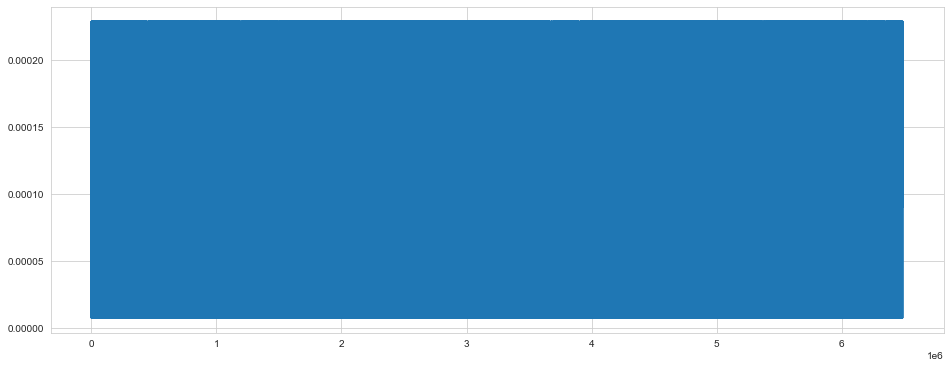

In [34]:
delay["GROUND_SERV_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

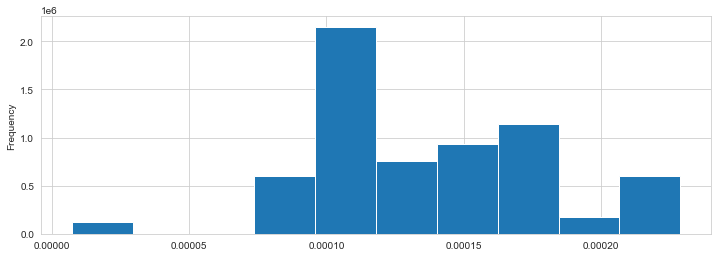

In [35]:
delay['GROUND_SERV_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### Plane age

<AxesSubplot:>

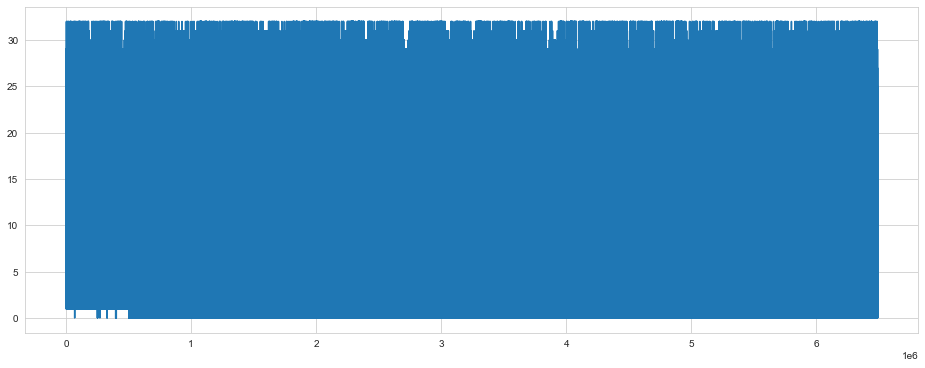

In [36]:
delay["PLANE_AGE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

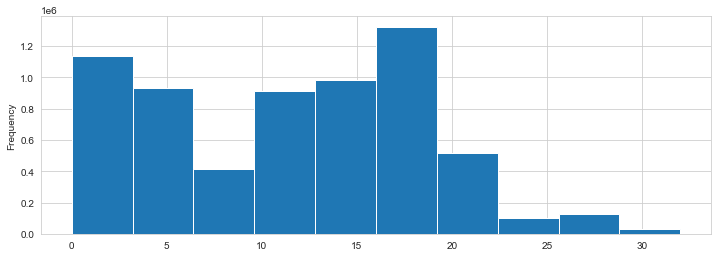

In [37]:
delay['PLANE_AGE'].plot(kind = 'hist', figsize = (12, 4))

### Departing airport

<AxesSubplot:xlabel='DEPARTING_AIRPORT'>

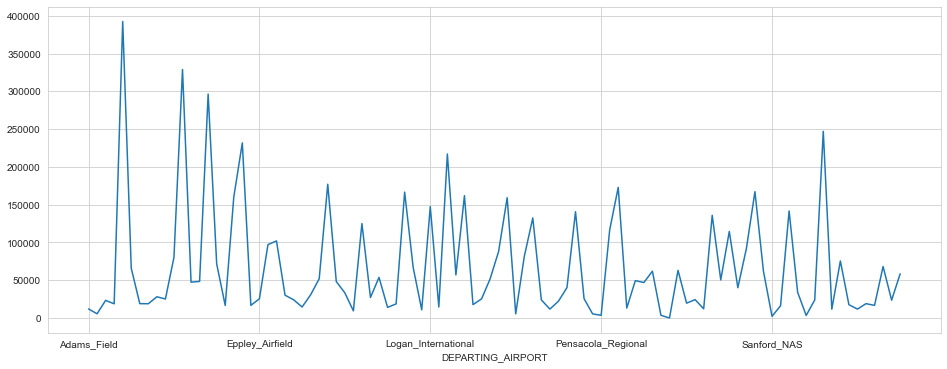

In [38]:
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Previous airport

<AxesSubplot:xlabel='PREVIOUS_AIRPORT'>

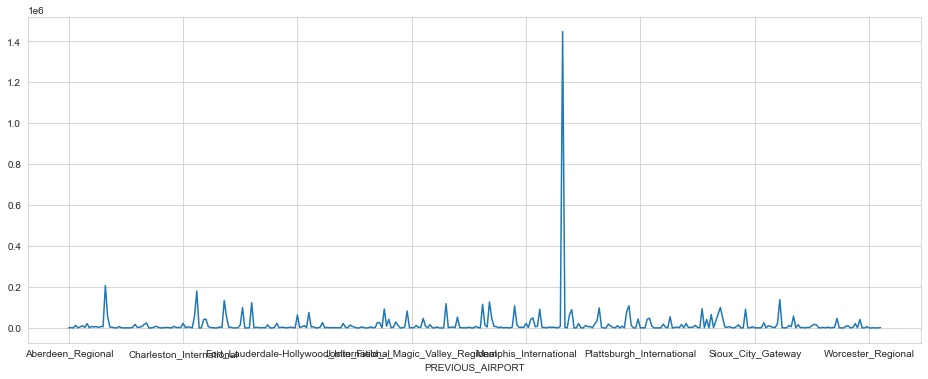

In [39]:
delay.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Precipitation

<AxesSubplot:>

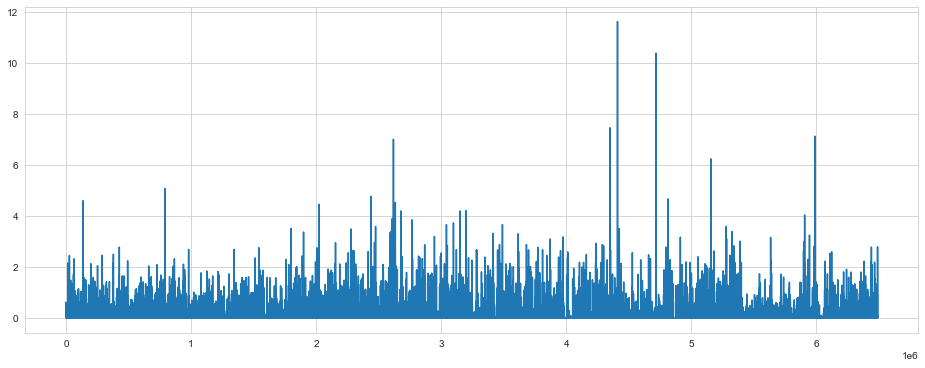

In [40]:
delay["PRCP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

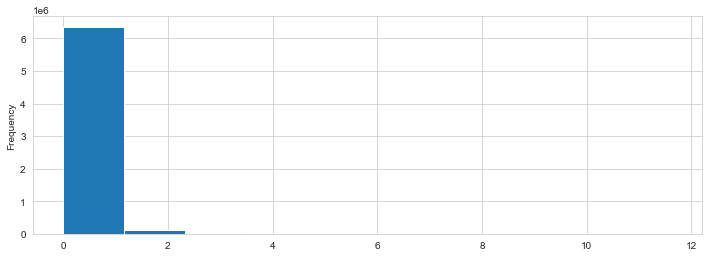

In [41]:
delay['PRCP'].plot(kind = 'hist', figsize = (12, 4))

### Snow (SNOW)
0 to 17.2
Inches of snowfall for day.

<AxesSubplot:>

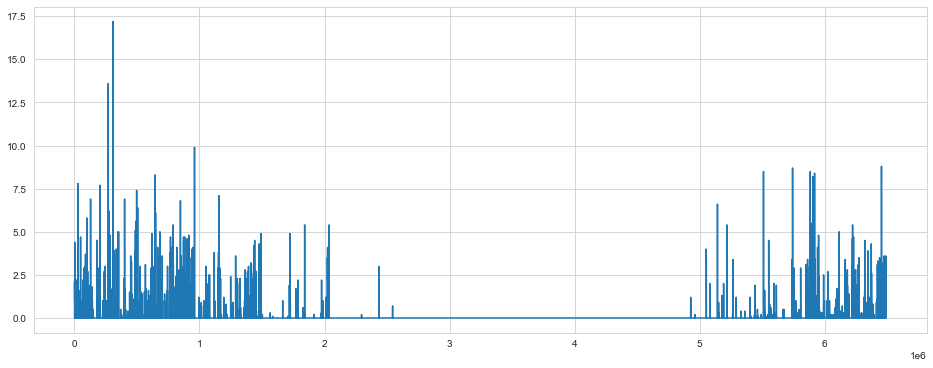

In [42]:
delay["SNOW"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

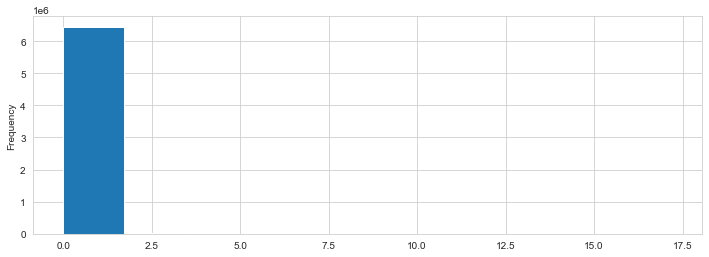

In [43]:
delay['SNOW'].plot(kind = 'hist', figsize = (12, 4))

### SNOWD
0 to 25.2
Inches of snow on ground for day.

<AxesSubplot:>

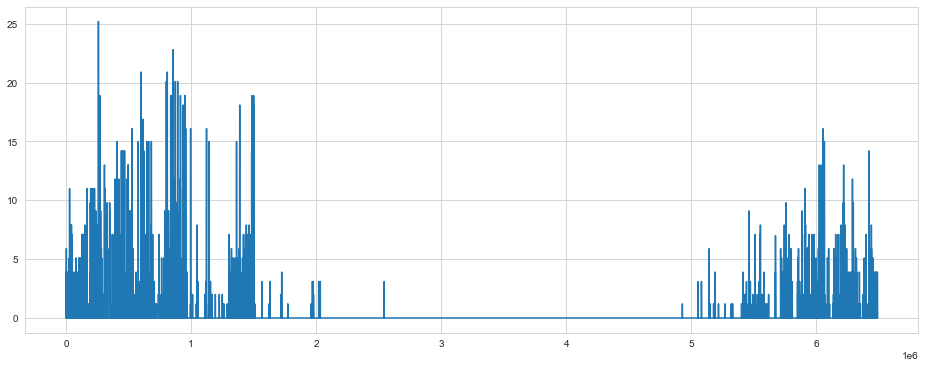

In [44]:
delay["SNWD"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

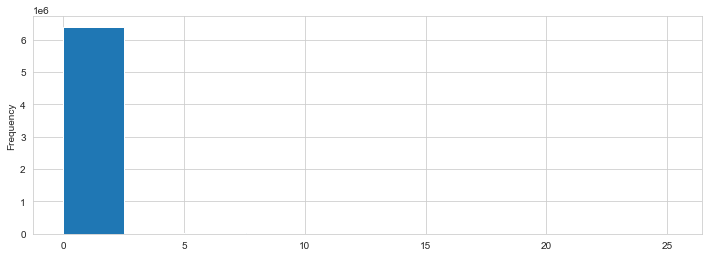

In [45]:
delay['SNWD'].plot(kind='hist', figsize = (12, 4))

### Temperature

<AxesSubplot:>

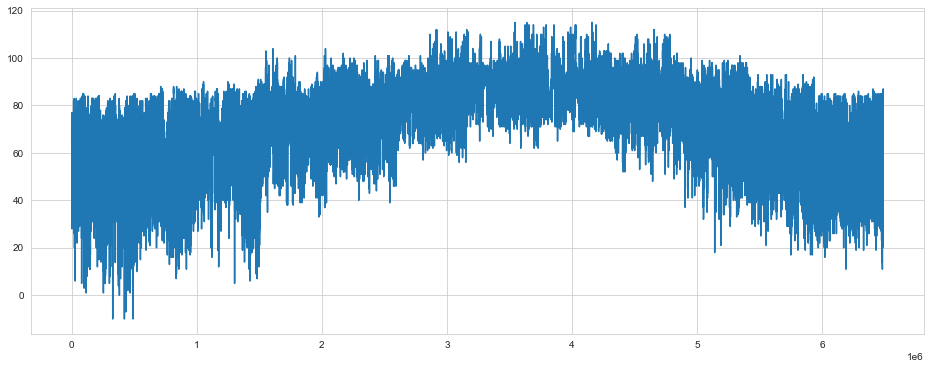

In [46]:
delay["TMAX"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

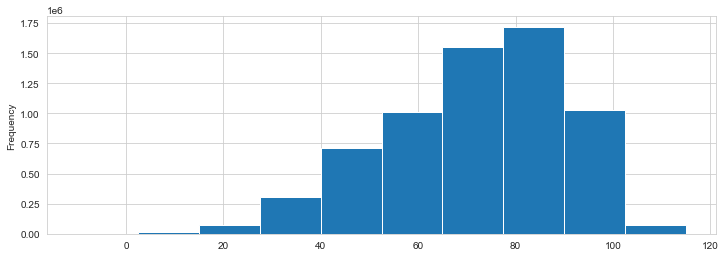

In [47]:
delay['TMAX'].plot(kind = 'hist', figsize = (12, 4))

### Air wind speed (AWND)
0 to 33.78
Max wind speed for day.

<AxesSubplot:>

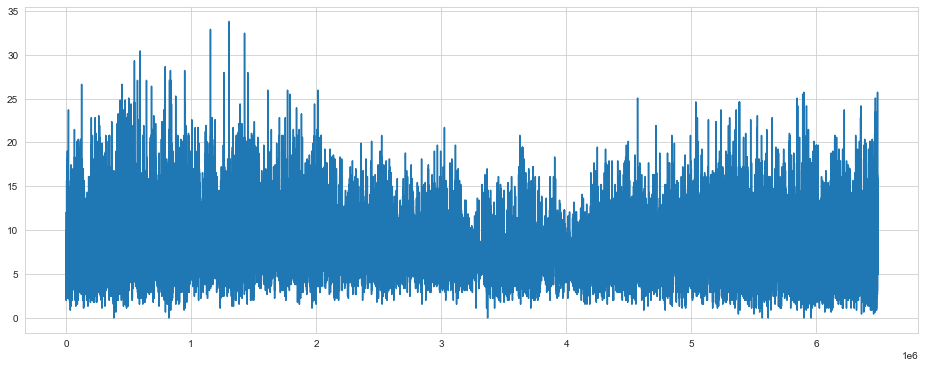

In [48]:
delay["AWND"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

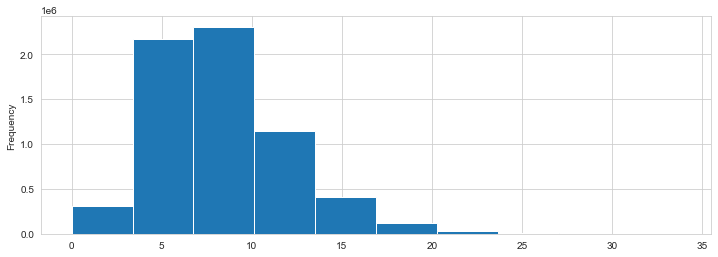

In [49]:
delay['AWND'].plot(kind = 'hist', figsize = (12, 4))

# 2. Data Cleanup

### DEP_TIME_BLK categorical variable

In [50]:
# Visualize the value counts
DEP_TIME_BLK_counts = delay.DEP_TIME_BLK.value_counts()
DEP_TIME_BLK_counts

0800_0859    452391
0700_0759    436032
0600_0659    430404
1700_1759    408878
1200_1259    398009
1000_1059    397751
0900_0959    396112
1100_1159    394884
1500_1559    388240
1400_1459    375981
1800_1859    374866
1600_1659    368464
1900_1959    358165
1300_1359    353000
2000_2059    342123
2100_2159    221087
2200_2259    193229
0001_0559    148580
2300_2359     50866
Name: DEP_TIME_BLK, dtype: int64

<AxesSubplot:ylabel='Density'>

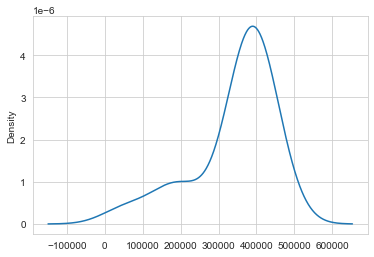

In [51]:
DEP_TIME_BLK_counts.plot.density()

In [52]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

In [53]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(delay.DEP_TIME_BLK.values.reshape(-1,1)))

In [54]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEP_TIME_BLK'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


DEP_TIME_BLK_0001_0559  DEP_TIME_BLK_0600_0659  DEP_TIME_BLK_0700_0759  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     1.0   
2                     0.0                     1.0                     0.0   
3                     0.0                     1.0                     0.0   
4                     1.0                     0.0                     0.0   

   DEP_TIME_BLK_0800_0859  DEP_TIME_BLK_0900_0959  DEP_TIME_BLK_1000_1059  \
0                     1.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   DEP_TIME_BLK_1100_1159  DEP_TIME_BLK_1200_1259  DEP_TIME_BLK_1300_1359  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   DEP_TIME_BLK_1400_1459  DEP_TIME_BLK_1500_1559  DEP_TIME_BLK_1600_1659  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   DEP_TIME_BLK_1700_1759  DEP_TIME_BLK_1800_1859  DEP_TIME_BLK_1900_1959  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   DEP_TIME_BLK_2000_2059  DEP_TIME_BLK_2100_2159  DEP_TIME_BLK_2200_2259  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   DEP_TIME_BLK_2300_2359  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [55]:
# Merge the two DataFrames together and drop the encoded column
delay_block = delay.merge(encode_df,left_index = True, right_index = True).drop(["DEP_TIME_BLK"], axis = 1)

In [56]:
delay_block.sample(5)

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
878260       2            3          0               2               3   
831799       2            2          0               2               4   
3525791      7            7          0               5               1   
1128091      3            6          0               6               3   
6353541     12            1          0               4               5   

         CONCURRENT_FLIGHTS  NUMBER_OF_SEATS                 CARRIER_NAME  \
878260                    7               50  American_Eagle_Airlines_Inc   
831799                   64               70                   Comair_Inc   
3525791                  13              120         United_Air_Lines_Inc   
1128091                  59              160        American_Airlines_Inc   
6353541                  18               76  American_Eagle_Airlines_Inc   

         AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  ...  \
878260                    2459                  21895  ...   
831799                   17206                  20452  ...   
3525791                   4068                  55374  ...   
1128091                  23912                  78308  ...   
6353541                  11092                  26721  ...   

         DEP_TIME_BLK_1400_1459  DEP_TIME_BLK_1500_1559  \
878260                      0.0                     1.0   
831799                      0.0                     0.0   
3525791                     0.0                     0.0   
1128091                     1.0                     0.0   
6353541                     0.0                     0.0   

         DEP_TIME_BLK_1600_1659  DEP_TIME_BLK_1700_1759  \
878260                      0.0                     0.0   
831799                      0.0                     0.0   
3525791                     0.0                     0.0   
1128091                     0.0                     0.0   
6353541                     0.0                     0.0   

         DEP_TIME_BLK_1800_1859  DEP_TIME_BLK_1900_1959  \
878260                      0.0                     0.0   
831799                      0.0                     0.0   
3525791                     0.0                     0.0   
1128091                     0.0                     0.0   
6353541                     1.0                     0.0   

        DEP_TIME_BLK_2000_2059  DEP_TIME_BLK_2100_2159  \
878260                     0.0                     0.0   
831799                     0.0                     0.0   
3525791                    0.0                     0.0   
1128091                    0.0                     0.0   
6353541                    0.0                     0.0   

         DEP_TIME_BLK_2200_2259 DEP_TIME_BLK_2300_2359  
878260                      0.0                    0.0  
831799                      0.0                    0.0  
3525791                     0.0                    0.0  
1128091                     0.0                    0.0  
6353541                     0.0                    0.0  

[5 rows x 44 columns]

In [57]:
# Fit the encoder and produce encoded DataFrame (CARRIER_NAME)
encode_df = pd.DataFrame(enc.fit_transform(delay_block.CARRIER_NAME.values.reshape(-1,1)))

In [58]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CARRIER_NAME'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CARRIER_NAME_Alaska_Airlines_Inc  CARRIER_NAME_Allegiant_Air  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   

   CARRIER_NAME_American_Airlines_Inc  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   CARRIER_NAME_American_Eagle_Airlines_Inc  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   CARRIER_NAME_Atlantic_Southeast_Airlines  CARRIER_NAME_Comair_Inc  \
0                                       0.0                      0.0   
1                                       0.0                      0.0   
2                                       0.0                      0.0   
3                                       0.0                      0.0   
4                                       0.0                      0.0   

   CARRIER_NAME_Delta_Air_Lines_Inc  CARRIER_NAME_Endeavor_Air_Inc  \
0                               0.0                            0.0   
1                               1.0                            0.0   
2                               1.0                            0.0   
3                               1.0                            0.0   
4                               0.0                            0.0   

   CARRIER_NAME_Frontier_Airlines_Inc  CARRIER_NAME_Hawaiian_Airlines_Inc  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   CARRIER_NAME_JetBlue_Airways  CARRIER_NAME_Mesa_Airlines_Inc  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   CARRIER_NAME_Midwest_Airline,_Inc  CARRIER_NAME_SkyWest_Airlines_Inc  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   CARRIER_NAME_Southwest_Airlines_Co  CARRIER_NAME_Spirit_Air_Lines  \
0                                 1.0                            0.0   
1                                 0.0                            0.0   
2                                 0.0                            0.0   
3                                 0.0                            0.0   
4                                 0.0                            1.0   

   CARRIER_NAME_United_Air_Lines_Inc  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0

In [59]:
# Merge the two DataFrames together and drop the encoded column
delay_carrier = delay_block.merge(encode_df,left_index = True, right_index = True).drop(["CARRIER_NAME"], axis = 1)

In [60]:
delay_carrier.sample(5)

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
1767531      4            3          0               2               6   
815566       2            1          0               3               4   
2842270      6            6          0               5               2   
1075313      3            5          0               3               2   
1361162      3            6          0               4               1   

         CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
1767531                  48               50                  12902   
815566                    9              128                   3548   
2842270                  53               76                  25390   
1075313                  83              157                  33799   
1361162                   6              158                   1519   

         AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
1767531                  67082                           3682  ...   
815566                   70199                            510  ...   
2842270                  27159                           4996  ...   
1075313                  84142                          21165  ...   
1361162                  84142                            144  ...   

         CARRIER_NAME_Endeavor_Air_Inc  CARRIER_NAME_Frontier_Airlines_Inc  \
1767531                            0.0                                 0.0   
815566                             0.0                                 0.0   
2842270                            0.0                                 0.0   
1075313                            0.0                                 0.0   
1361162                            0.0                                 0.0   

         CARRIER_NAME_Hawaiian_Airlines_Inc  CARRIER_NAME_JetBlue_Airways  \
1767531                                 0.0                           0.0   
815566                                  0.0                           0.0   
2842270                                 0.0                           0.0   
1075313                                 0.0                           0.0   
1361162                                 0.0                           0.0   

         CARRIER_NAME_Mesa_Airlines_Inc CARRIER_NAME_Midwest_Airline,_Inc  \
1767531                             0.0                               0.0   
815566                              0.0                               0.0   
2842270                             0.0                               0.0   
1075313                             0.0                               0.0   
1361162                             0.0                               0.0   

         CARRIER_NAME_SkyWest_Airlines_Inc  \
1767531                                1.0   
815566                                 0.0   
2842270                                0.0   
1075313                                0.0   
1361162                                0.0   

         CARRIER_NAME_Southwest_Airlines_Co CARRIER_NAME_Spirit_Air_Lines  \
1767531                                 0.0                           0.0   
815566                                  0.0                           0.0   
2842270                                 0.0                           0.0   
1075313                                 0.0                           0.0   
1361162                                 0.0                           0.0   

         CARRIER_NAME_United_Air_Lines_Inc  
1767531                                0.0  
815566                                 0.0  
2842270                                0.0  
1075313                                0.0  
1361162                                0.0  

[5 rows x 60 columns]

In [61]:
# Convert DEPARTING_AIRPORT categorical variable
encode_df = pd.DataFrame(enc.fit_transform(delay_carrier.DEPARTING_AIRPORT.values.reshape(-1,1)))

In [62]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEPARTING_AIRPORT'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


DEPARTING_AIRPORT_Adams_Field  DEPARTING_AIRPORT_Albany_International  \
0                            0.0                                     0.0   
1                            0.0                                     0.0   
2                            0.0                                     0.0   
3                            0.0                                     0.0   
4                            0.0                                     0.0   

   DEPARTING_AIRPORT_Albuquerque_International_Sunport  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   DEPARTING_AIRPORT_Anchorage_International  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   DEPARTING_AIRPORT_Atlanta_Municipal  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   DEPARTING_AIRPORT_Austin___Bergstrom_International  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   DEPARTING_AIRPORT_Birmingham_Airport  DEPARTING_AIRPORT_Boise_Air_Terminal  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   DEPARTING_AIRPORT_Bradley_International  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   DEPARTING_AIRPORT_Charleston_International  ...  \
0                                         0.0  ...   
1                                         0.0  ...   
2                                         0.0  ...   
3                                         0.0  ...   
4                                         0.0  ...   

   DEPARTING_AIRPORT_Stapleton_International  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   DEPARTING_AIRPORT_Syracuse_Hancock_International  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   DEPARTING_AIRPORT_Tampa_International  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   DEPARTING_AIRPORT_Theodore_Francis_Green_State  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   DEPARTING_AIRPOR

In [63]:
# Merge the two DataFrames together and drop the encoded column
delay_departing = delay_carrier.merge(encode_df,left_index = True, right_index = True).drop(["DEPARTING_AIRPORT"], axis = 1)

In [64]:
delay_departing.sample(5)

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
5146050     10            2          0               2               3   
3307949      7            2          0               1               5   
1968541      4            3          0               3               5   
6279531     12            1          1               2               2   
6065320     12            3          0               1               1   

         CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
5146050                   6               50                   2796   
3307949                  52               50                  35086   
1968541                   8               66                   3815   
6279531                  18              146                  13645   
6065320                  18               76                  12707   

         AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
5146050                  27632                            104  ...   
3307949                  72721                           2297  ...   
1968541                  67082                            101  ...   
6279531                  21752                           1778  ...   
6065320                  23119                           1176  ...   

         DEPARTING_AIRPORT_Stapleton_International  \
5146050                                        0.0   
3307949                                        0.0   
1968541                                        0.0   
6279531                                        0.0   
6065320                                        0.0   

         DEPARTING_AIRPORT_Syracuse_Hancock_International  \
5146050                                               0.0   
3307949                                               0.0   
1968541                                               0.0   
6279531                                               0.0   
6065320                                               0.0   

         DEPARTING_AIRPORT_Tampa_International  \
5146050                                    0.0   
3307949                                    0.0   
1968541                                    0.0   
6279531                                    0.0   
6065320                                    0.0   

         DEPARTING_AIRPORT_Theodore_Francis_Green_State  \
5146050                                             0.0   
3307949                                             0.0   
1968541                                             0.0   
6279531                                             0.0   
6065320                                             0.0   

         DEPARTING_AIRPORT_Truax_Field  \
5146050                            0.0   
3307949                            0.0   
1968541                            0.0   
6279531                            0.0   
6065320                            0.0   

         DEPARTING_AIRPORT_Tucson_International  \
5146050                                     0.0   
3307949                                     0.0   
1968541                                     0.0   
6279531                                     0.0   
6065320                                     0.0   

         DEPARTING_AIRPORT_Tulsa_International  \
5146050                                    0.0   
3307949                                    0.0   
1968541                                    0.0   
6279531                                    0.0   
6065320                                    0.0   

        DEPARTING_AIRPORT_Washington_Dulles_International  \
5146050                                               0.0   
3307949                                               0.0   
1968541                                               0.0   
6279531                                               0.0   
6065320                                               0.0   

         DEPARTING_AIRPORT_Will_Rogers_World  \
5146050                                  0.0   
3307949                                  0.0

### Replace with 1 if a previous airport exists (connection flight)

In [65]:
delay_departing["PREVIOUS_AIRPORT"] = np.where(delay_departing["PREVIOUS_AIRPORT"] == "NONE", 0, 1)

### Apply PCA to airport coordinates, reduce from two to one feature

In [66]:
coord_pca = delay_departing[['LATITUDE', 'LONGITUDE']]
coord_pca.head()

LATITUDE  LONGITUDE
0     36.08   -115.152
1     36.08   -115.152
2     36.08   -115.152
3     36.08   -115.152
4     36.08   -115.152

In [67]:
# Initialize PCA model
pca = PCA(n_components = 1)

In [68]:
# Get principal component for the dataset
transfor_coord = pca.fit_transform(coord_pca)
transfor_coord

array([[20.90469902],
       [20.90469902],
       [20.90469902],
       ...,
       [65.6518818 ],
       [65.6518818 ],
       [65.6518818 ]])

In [69]:
# Transform PCA data to a DataFrame
new_coord = pd.DataFrame(data = transfor_coord, columns = ["principal_component"])
new_coord.sample(5)

principal_component
3854915            17.875506
1371889            -9.690771
4432002           -23.466252
3442218           -12.592797
926829            -17.672370

In [70]:
# Explained variance
pca.explained_variance_ratio_

array([0.91525953])

### Remove LATITUDE and LONGITUD
### Merge dataframe with one PCA feature

In [71]:
delay_departing.drop(['LATITUDE', 'LONGITUDE'], axis = 1, inplace = True)

In [72]:
delay_withPCA = pd.concat([delay_departing, new_coord], axis = 1)
delay_withPCA

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
0            1            7          0               2               1   
1            1            7          0               7               1   
2            1            7          0               7               1   
3            1            7          0               9               1   
4            1            7          0               7               1   
...        ...          ...        ...             ...             ...   
6489057     12            7          0               1              11   
6489058     12            7          0               1              11   
6489059     12            7          0               1              11   
6489060     12            7          0               1              12   
6489061     12            7          1               1              12   

         CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
0                        25              143                  13056   
1                        29              191                  13056   
2                        27              199                  13056   
3                        27              180                  13056   
4                        10              182                  13056   
...                     ...              ...                    ...   
6489057                   3              123                   1318   
6489058                   2              123                   1318   
6489059                   2              123                   1318   
6489060                   3              123                   1318   
6489061                   3              123                   1318   

         AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
0                       107363                           5873  ...   
1                        73508                           1174  ...   
2                        73508                           1174  ...   
3                        73508                           1174  ...   
4                        15023                           1257  ...   
...                        ...                            ...  ...   
6489057                   7268                            757  ...   
6489058                   7268                            757  ...   
6489059                   7268                            757  ...   
6489060                   7268                            757  ...   
6489061                   7268                            757  ...   

         DEPARTING_AIRPORT_Syracuse_Hancock_International  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                                     0.0   
4                                                     0.0   
...                                                   ...   
6489057                                               0.0   
6489058                                               0.0   
6489059                                               0.0   
6489060                                               0.0   
6489061                                               0.0   

         DEPARTING_AIRPORT_Tampa_International  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
6489057                                    0.0   
6489058                                    0.0   
6489059                                    0.0   
6489060                                    0.0   
6489061                                    0.0   

         DEPARTING_AIRPORT_Theodore_Francis_Green_State  \
0                                

In [73]:
delay_withPCA = delay_withPCA[['DEP_DEL15'] + [col for col in delay_withPCA.columns if col != 'DEP_DEL15']]
delay_withPCA

DEP_DEL15  MONTH  DAY_OF_WEEK  DISTANCE_GROUP  SEGMENT_NUMBER  \
0                0      1            7               2               1   
1                0      1            7               7               1   
2                0      1            7               7               1   
3                0      1            7               9               1   
4                0      1            7               7               1   
...            ...    ...          ...             ...             ...   
6489057          0     12            7               1              11   
6489058          0     12            7               1              11   
6489059          0     12            7               1              11   
6489060          0     12            7               1              12   
6489061          1     12            7               1              12   

         CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
0                        25              143                  13056   
1                        29              191                  13056   
2                        27              199                  13056   
3                        27              180                  13056   
4                        10              182                  13056   
...                     ...              ...                    ...   
6489057                   3              123                   1318   
6489058                   2              123                   1318   
6489059                   2              123                   1318   
6489060                   3              123                   1318   
6489061                   3              123                   1318   

         AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
0                       107363                           5873  ...   
1                        73508                           1174  ...   
2                        73508                           1174  ...   
3                        73508                           1174  ...   
4                        15023                           1257  ...   
...                        ...                            ...  ...   
6489057                   7268                            757  ...   
6489058                   7268                            757  ...   
6489059                   7268                            757  ...   
6489060                   7268                            757  ...   
6489061                   7268                            757  ...   

         DEPARTING_AIRPORT_Syracuse_Hancock_International  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                                     0.0   
4                                                     0.0   
...                                                   ...   
6489057                                               0.0   
6489058                                               0.0   
6489059                                               0.0   
6489060                                               0.0   
6489061                                               0.0   

         DEPARTING_AIRPORT_Tampa_International  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
6489057                                    0.0   
6489058                                    0.0   
6489059                                    0.0   
6489060                                    0.0   
6489061                                    0.0   

         DEPARTING_AIRPORT_Theodore_Francis_Green_State  \
0                                

In [75]:
for i in delay_withPCA.columns:
    print(i)

DEP_DEL15
MONTH
DAY_OF_WEEK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
DEP_TIME_BLK_0001_0559
DEP_TIME_BLK_0600_0659
DEP_TIME_BLK_0700_0759
DEP_TIME_BLK_0800_0859
DEP_TIME_BLK_0900_0959
DEP_TIME_BLK_1000_1059
DEP_TIME_BLK_1100_1159
DEP_TIME_BLK_1200_1259
DEP_TIME_BLK_1300_1359
DEP_TIME_BLK_1400_1459
DEP_TIME_BLK_1500_1559
DEP_TIME_BLK_1600_1659
DEP_TIME_BLK_1700_1759
DEP_TIME_BLK_1800_1859
DEP_TIME_BLK_1900_1959
DEP_TIME_BLK_2000_2059
DEP_TIME_BLK_2100_2159
DEP_TIME_BLK_2200_2259
DEP_TIME_BLK_2300_2359
CARRIER_NAME_Alaska_Airlines_Inc
CARRIER_NAME_Allegiant_Air
CARRIER_NAME_American_Airlines_Inc
CARRIER_NAME_American_Eagle_Airlines_Inc
CARRIER_NAME_Atlantic_Southeast_Airlines
CARRIER_NAME_Comair_Inc
CARRIER_NAME_Delta_Air_Lines_Inc
CARRIER_NAME_En

## Save cleaned data as a new csv file

In [ ]:
#      ADD NEWNAME to GITIGNORE!!!!!
delay_withPCA.to_csv("./Resources/delay_clean.csv", index = False)